In [291]:
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd
from sklearn.metrics import accuracy_score

## Visualize dataset

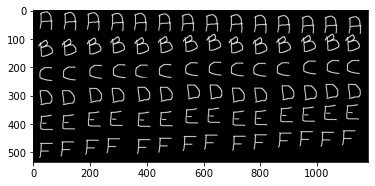

In [292]:
img = cv.imread('Images/alpha__.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = cv.resize(gray, (280, 120))
# read the image
im = plt.imread('Images/alpha__.png')
# show the image
plt.imshow(im)
plt.show()

## Show first letter in the dataset

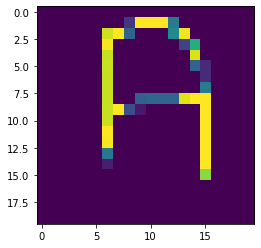

In [293]:
cells = [np.hsplit(row,14) for row in np.vsplit(gray,6)]
x = np.array(cells)
plt.imshow(x[0][0])
plt.show()

In [294]:
x.shape

(6, 14, 20, 20)

In [295]:
knn_features = x[:,:14].reshape(-1,400).astype(np.float32)
knn_features.shape

(84, 400)

In [296]:
k = np.arange(6)
knn_target = np.repeat(k,14)
knn_target.shape

(84,)

## Helper functions

In [297]:
# Predict function for knn
def knn_predict(x):
    prediction = knn.predict(x)
    return prediction

In [298]:
def find_best_k(search_range, test_number):
    # Create train and test set
    X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(knn_features, knn_target, test_size=test_number, random_state=42)

    find_k = []
    for x in range(1,search_range):
        #Create KNN Classifier and set number of neigbors
        knn = KNeighborsClassifier(n_neighbors=x)

        # Trainig phase
        knn.fit(X_train_knn, y_train_knn)

        # Predict on the test set
        prediction_X_test_knn = knn_predict(X_test_knn)

        # Check the accuracy comparing our test values to true values
        acc = accuracy_score(y_test_knn, prediction_X_test_knn)
        find_k.append(int(round(acc*100)))
        #print(f'Accuracy: {int(round(acc*100))}%')

    best_k = find_k.index(max(find_k))
    best_k+=1
    return best_k
    

## Predict on my own alphabet

In [299]:
# Set k-range and test size
best_k = find_best_k(20, 0.8)

#Create KNN Classifier and set number of neigbors
knn = KNeighborsClassifier(n_neighbors=best_k)

# Trainig phase
knn.fit(X_train_knn, y_train_knn)

# Predict on the test set
prediction_X_test_knn = knn_predict(X_test_knn)

# Check the accuracy comparing our test values to true values
acc = accuracy_score(y_test_knn, prediction_X_test_knn)

print(f'Accuracy: {int(round(acc*100))}%')

Accuracy: 76%


# Prediction method 2: Own alphabet

In [300]:
img = cv.imread('Images/alpha__.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = cv.resize(gray, (280, 120))

# Now we split the image to 84 cells, each 20x20 size
cells = [np.hsplit(row,14) for row in np.vsplit(gray,6)]
# Make it into a Numpy array: its size will be (6,14,20,20)
x = np.array(cells)

# Now we prepare the training data and test data
train = x[:,:13].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,13:14].reshape(-1,400).astype(np.float32) # Size = (2500,400)

k = np.arange(6)

train_labels = np.repeat(k,13)
test_labels = np.repeat(k,1)

# Find best K
find_k = []
for x in range(1,20):
    
    KNN = KNeighborsClassifier(x)
    KNN.fit(train,train_labels)
    prediction_X_test_knn = KNN.predict(test)

    # Check the accuracy comparing our test values to true values
    acc = accuracy_score(test_labels, prediction_X_test_knn)

    find_k.append(int(round(acc*100)))
    
best_k = find_k.index(max(find_k))
best_k+=1
best_k

KNN = KNeighborsClassifier(best_k)
KNN.fit(train,train_labels)

prediction_X_test_knn = KNN.predict(test)
prediction_X_test_knn

# Check the accuracy comparing our test values to true values
acc = accuracy_score(test_labels, prediction_X_test_knn)

print(f'Accuracy: {int(round(acc*100))}%')

Accuracy: 50%
